# Machine  Learning coursework3

change the name of your notebook file to your name and reg number. As usual, send the files to the class coordinator, she will zip them and send me a single compressed folder. work submitted past the deadline won't be accepted.  deadline 08:59, 19/03/2023.  Submit only a single notebook file.


# q1. Probability Question (10 mks)

In this part, you are given 1 probability question that you will solve by hand ( You do not code anything ). You can either share your answer via Markdown Cells, or you can insert an image of your hand-written solution on a paper. To insert an image, after changing the cell type to Markdown, click Edit -> Insert Image, it will be directly embedded in the notebook file. Try to keep your answers as illustrative as possible.

Soroti is a busy city, and unfortunately busy cities tend to have serious traffics. In Soroti, one in every two days, there is a traffic jam on the main roads, if the weather is sunny. However if it rains, it gets worse! Three in every four rainy days, main roads are jammed with traffic! 

Our dear lecturer for machine learning, Dr. Abubakhari Sserwadda is simple but such a hardworking one, however sometimes life happens, and he might arrive late to the class. If the weather is rainy and there is a traffic jam, the probability of him being late is 20%. Otherwise, he is late to only 5% of the classes.

Given a randomly selected day, What is the probability that the weather is rainy, there is no traffic jam and Dr. Abubakhari is NOT late to the class?

Double click on here to put your answer!

# q2.  You will use the 'coursework3data' dataset given for this coursework. The last column of the file represents the label (class 0 or class 1)  (90mks)

Examine the dataset. The number of samples, features and the classes. Classify given dataset using the following algorithms. one at time. 
(i)  Decision trees 
(ii) Random forest 
(iii)linear SVM
(iv) SVM with RBF kernel
(v) Artificial Nueral Network
Feel free to import and use any libaries you wish. Use default parameters for each algorithm. Use 10 cross validation in all experiments.  Report the test accuracy, precision and F1 score for each algorithm. Plot the classification results for each algorithm. Make sure the figures are well displayed in your notebook file. Comment on the performance of algorithms, which algorithm would you recommend for this task and why?.


NB. have comments below codes you implemented. 


In [1]:
#Question2
import pandas as pd 
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt

# Load the dataset
df = loadmat('coursework3data.mat')
data = pd.DataFrame(df['z'], columns=['Trait1', 'Trait2', 'Targets'])


In [2]:
# Examine dataset properties
num_samples = data.shape[0]
num_features = data.shape[1] - 1  # Subtract 1 for the target column
num_classes = len(data['Targets'].unique())

print("Number of samples:", num_samples)
print("Number of features:", num_features)
print("Number of classes:", num_classes)

Number of samples: 180
Number of features: 2
Number of classes: 2


In [3]:
# Split data into features (X) and target (y)
X = data[['Trait1', 'Trait2']]
y = data['Targets']

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Linear SVM": SVC(kernel='linear'),
    "SVM with RBF kernel": SVC(kernel='rbf'),
    "Artificial Neural Network": MLPClassifier()
}

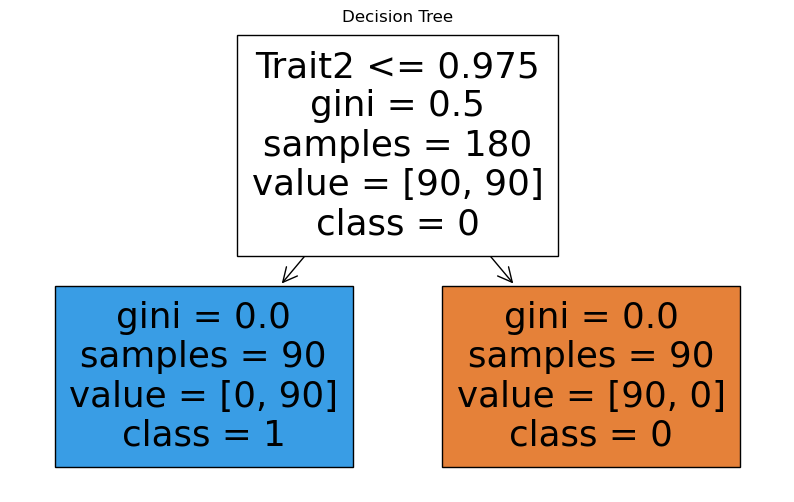

C:\Users\Thinkpad\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Thinkpad\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Thinkpad\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Thinkpad\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Thinkpad\anaconda3\Lib\site-packages\sklearn\neural

In [7]:
# Perform classification and evaluation
results = {}
for name, clf in classifiers.items():
    # Perform cross-validation
    scores_accuracy = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    
    # Train the classifier
    clf.fit(X, y)
    
    # Test the classifier
    y_pred = clf.predict(X)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    # Store results
    results[name] = {
        "Accuracy": np.mean(scores_accuracy),
        "Precision": precision,
        "F1 Score": f1
    }
    # Plot decision tree for Decision Tree classifier
    if name == "Decision Tree":
        plt.figure(figsize=(10, 6))
        plot_tree(clf, filled=True, feature_names=['Trait1', 'Trait2'], class_names=['0', '1'])
        plt.title("Decision Tree")
        plt.show()

In [8]:
# Print results
print("\nResults:")
for name, scores in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {scores['Accuracy']:.4f}")
    print(f"  Precision: {scores['Precision']:.4f}")
    print(f"  F1 Score: {scores['F1 Score']:.4f}")
    print()


Results:
Decision Tree:
  Accuracy: 0.9944
  Precision: 1.0000
  F1 Score: 1.0000

Random Forest:
  Accuracy: 1.0000
  Precision: 1.0000
  F1 Score: 1.0000

Linear SVM:
  Accuracy: 0.9889
  Precision: 1.0000
  F1 Score: 0.9831

SVM with RBF kernel:
  Accuracy: 0.9889
  Precision: 1.0000
  F1 Score: 0.9888

Artificial Neural Network:
  Accuracy: 0.9944
  Precision: 1.0000
  F1 Score: 0.9944



C:\Users\Thinkpad\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


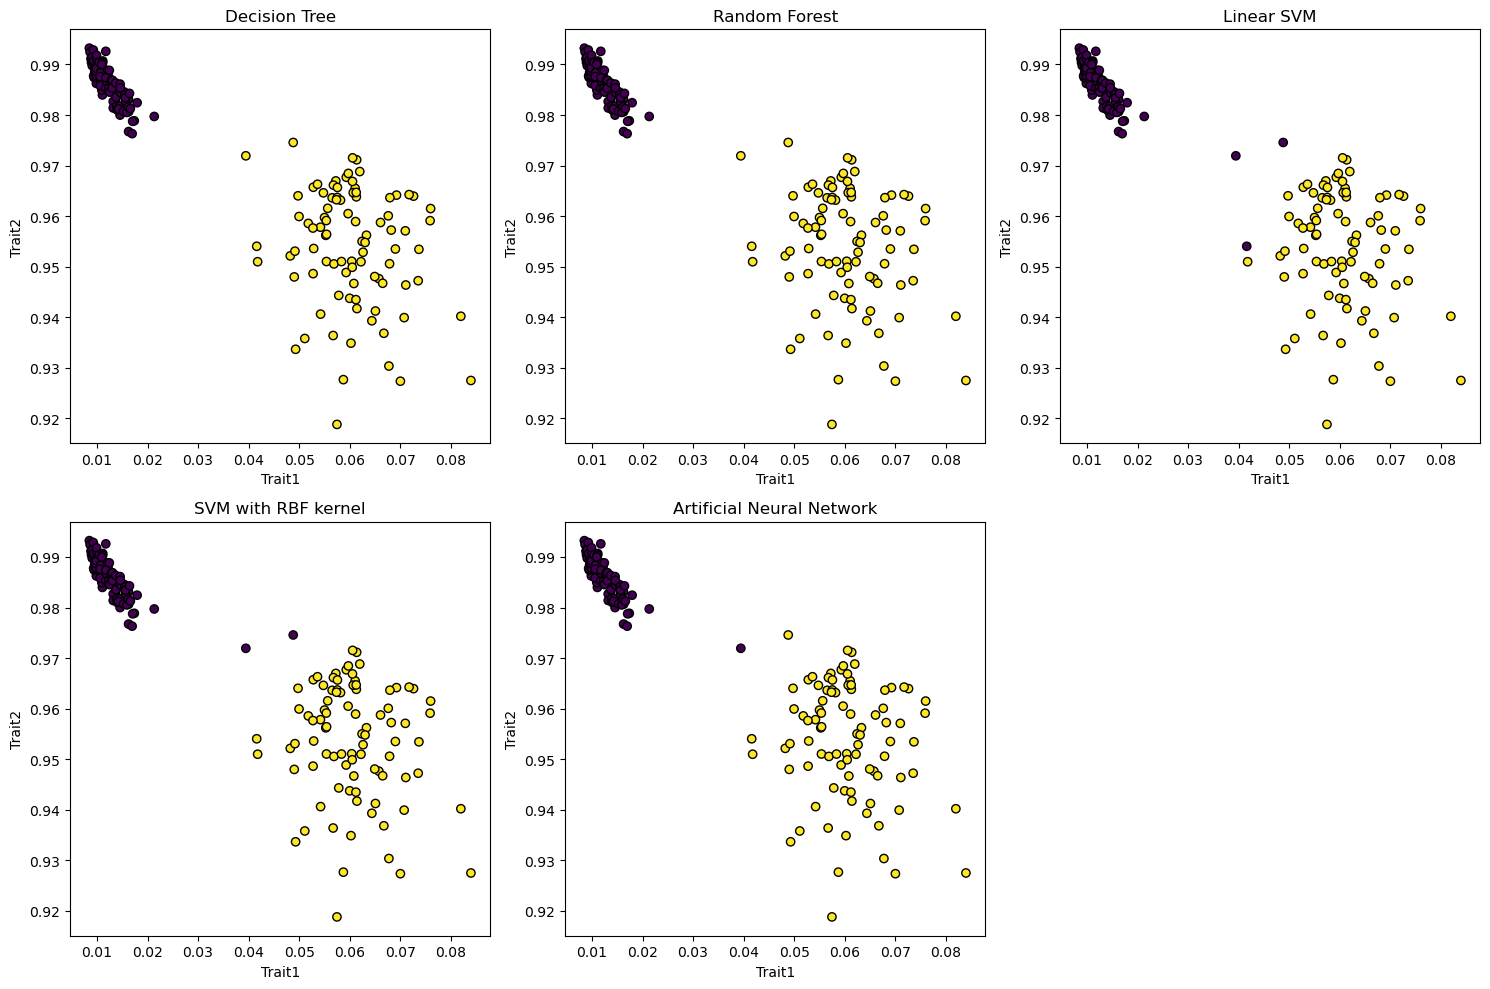

In [11]:
# Plot classification results for each algorithm
plt.figure(figsize=(15, 10))
for i, (name, clf) in enumerate(classifiers.items()):
    plt.subplot(2, 3, i + 1)
    
    # Fit the classifier
    clf.fit(X, y)
    
    # Predict class labels
    y_pred = clf.predict(X)
    
    # Plot data points colored by predicted class labels
    plt.scatter(X['Trait1'], X['Trait2'], c=y_pred, cmap='viridis', edgecolor='k')
    
    # Set labels and title
    plt.xlabel('Trait1')
    plt.ylabel('Trait2')
    plt.title(name)

plt.tight_layout()
plt.show()


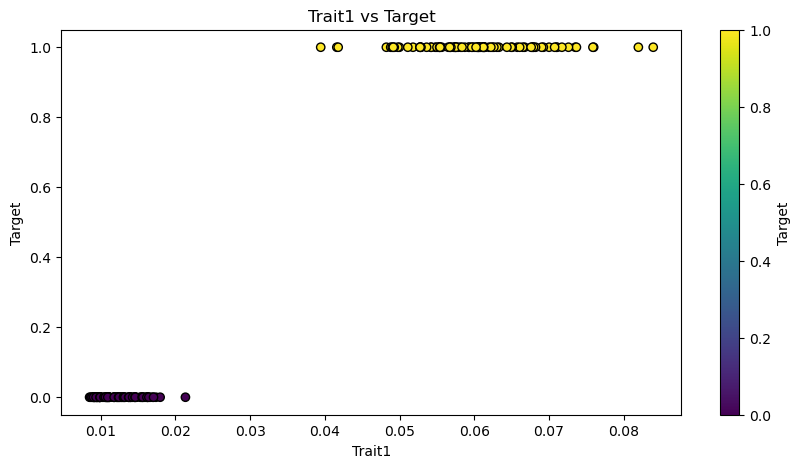

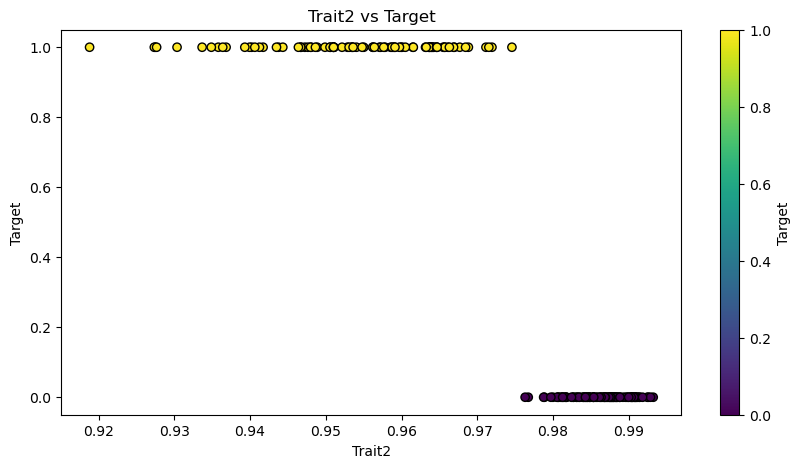

In [12]:
# Plot Trait1 against target
plt.figure(figsize=(10, 5))
plt.scatter(data['Trait1'], data['Targets'], c=data['Targets'], cmap='viridis', edgecolor='k')
plt.xlabel('Trait1')
plt.ylabel('Target')
plt.title('Trait1 vs Target')
plt.colorbar(label='Target')
plt.show()

# Plot Trait2 against target
plt.figure(figsize=(10, 5))
plt.scatter(data['Trait2'], data['Targets'], c=data['Targets'], cmap='viridis', edgecolor='k')
plt.xlabel('Trait2')
plt.ylabel('Target')
plt.title('Trait2 vs Target')
plt.colorbar(label='Target')
plt.show()


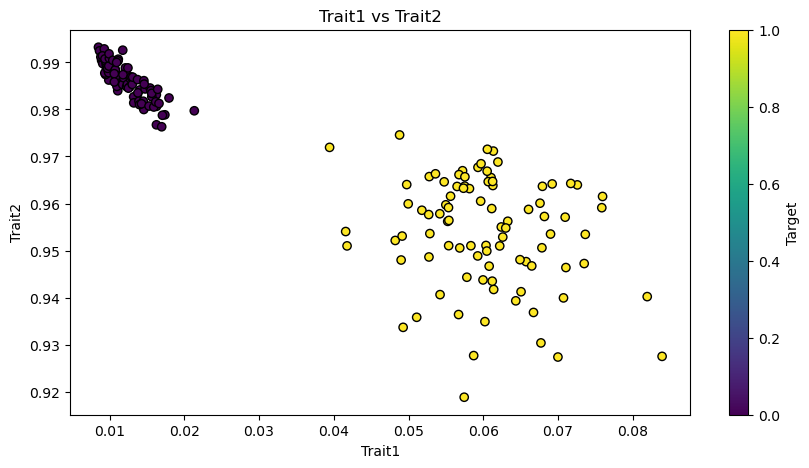

In [13]:
# Plot Trait1 against Trait2
plt.figure(figsize=(10, 5))
plt.scatter(data['Trait1'], data['Trait2'], c=data['Targets'], cmap='viridis', edgecolor='k')
plt.xlabel('Trait1')
plt.ylabel('Trait2')
plt.title('Trait1 vs Trait2')
plt.colorbar(label='Target')
plt.show()
